In [19]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

import jax.numpy as jnp
import jax.random as jrandom

from plnn.data_generation.simulate import simulate_landscape, get_landscape_func
from plnn.models.algebraic_pl import AlgebraicPL
from plnn.pl import plot_phi, plot_f



In [20]:
seed = 123
rng = np.random.default_rng(seed=seed)

In [21]:
OUTDIR = "out"

In [22]:
SIGMA = 0.1

CASE = 1
# CASE = 2
# CASE = 3

In [23]:
x0 = [0, -0.5]
tfin = 72
dt = 0.01
dt_save = 12
ani_dt = 1
ncells = 250
burnin = 0.1

burnin = int(burnin * tfin // dt)

landscape_name = "phi_stitched"

nsignals = 2
signal_schedule = "sigmoid"
noise_schedule = 'constant'
noise_args = [SIGMA]

burnin_signal = [0.0, 1.0]

param_func_args = {}
param_func_args['weights'] = np.array([
    [0.93673468, -0.552672891, 0.189965361, 
     -0.660020293, -0.488002102, -0.172011631],
    [1.965818467, 8.606555247, 0.114517759, 
     -0.533331098, -0.115242317, -0.643382254]
], dtype=np.float64)
param_func_args['bias'] = np.array([
    -2.208609006, -7.355403139, -1.591722466, 
     0.658224396, 0.738781211, 0.897892629
], dtype=np.float64)


if CASE == 1:
    saveas="phi_stitched_ani_demo1"
    sigparams = np.array([
        [10, 1, 0.0, 5],
        [50, 1, 0.9, 5]
    ])
elif CASE == 2:
    saveas="phi_stitched_ani_demo2"
    sigparams = np.array([
        [20, 1, 0.0, 5],
        [10, 1, 0, 5]
    ])
elif CASE == 3:
    saveas="phi_stitched_ani_demo3"
    sigparams = np.array([
        [58, 1, 0.0, 100],
        [11, 1, 0.9, 100]
    ])

In [24]:
simseed = rng.integers(2**32)
ts_saved, xs_saved, sigs_saved, ps_saved = simulate_landscape(
    landscape_name=landscape_name,
    ncells=ncells, 
    x0=x0,
    tfin=tfin, 
    dt=dt, 
    dt_save=dt_save, 
    burnin=burnin,
    burnin_signal=burnin_signal,
    nsignals=nsignals,
    signal_schedule=signal_schedule, 
    sigparams=sigparams,
    param_func_name='linear',
    param_func_args=param_func_args,
    noise_schedule=noise_schedule, 
    noise_args=noise_args,
    seed=simseed
)
        

In [25]:
# Rerun simulation with finer saverate
ts, xs, sigs, ps = simulate_landscape(
    landscape_name=landscape_name,
    ncells=ncells, 
    x0=x0,
    tfin=tfin, 
    dt=dt, 
    dt_save=ani_dt, 
    burnin=burnin,
    burnin_signal=burnin_signal,
    nsignals=nsignals,
    signal_schedule=signal_schedule, 
    sigparams=sigparams,
    param_func_name='linear',
    param_func_args=param_func_args,
    noise_schedule=noise_schedule, 
    noise_args=noise_args,
    seed=simseed
)

In [26]:
from plnn.data_generation.phi_animator import PhiSimulationAnimator

animator = PhiSimulationAnimator(
    ts, xs, sigs, ps, 
    ts_saved, xs_saved, sigs_saved, ps_saved,
    xlims=[-4, 4], 
    ylims=[-4, 4],
    p0lims=[-2, 2],
    p1lims=[-2, 2],
    p0idx=0,
    p1idx=1,
    phi_func=get_landscape_func(landscape_name),
    bifcurves=None,
    bifcolors=None,
    info_str="",
    sigparams_str="",
    grads=None,
    grad_func=None,
)

Generating movie...
Finished in 0.156 seconds.
Saving animation to out/phi_stitched_ani_demo1


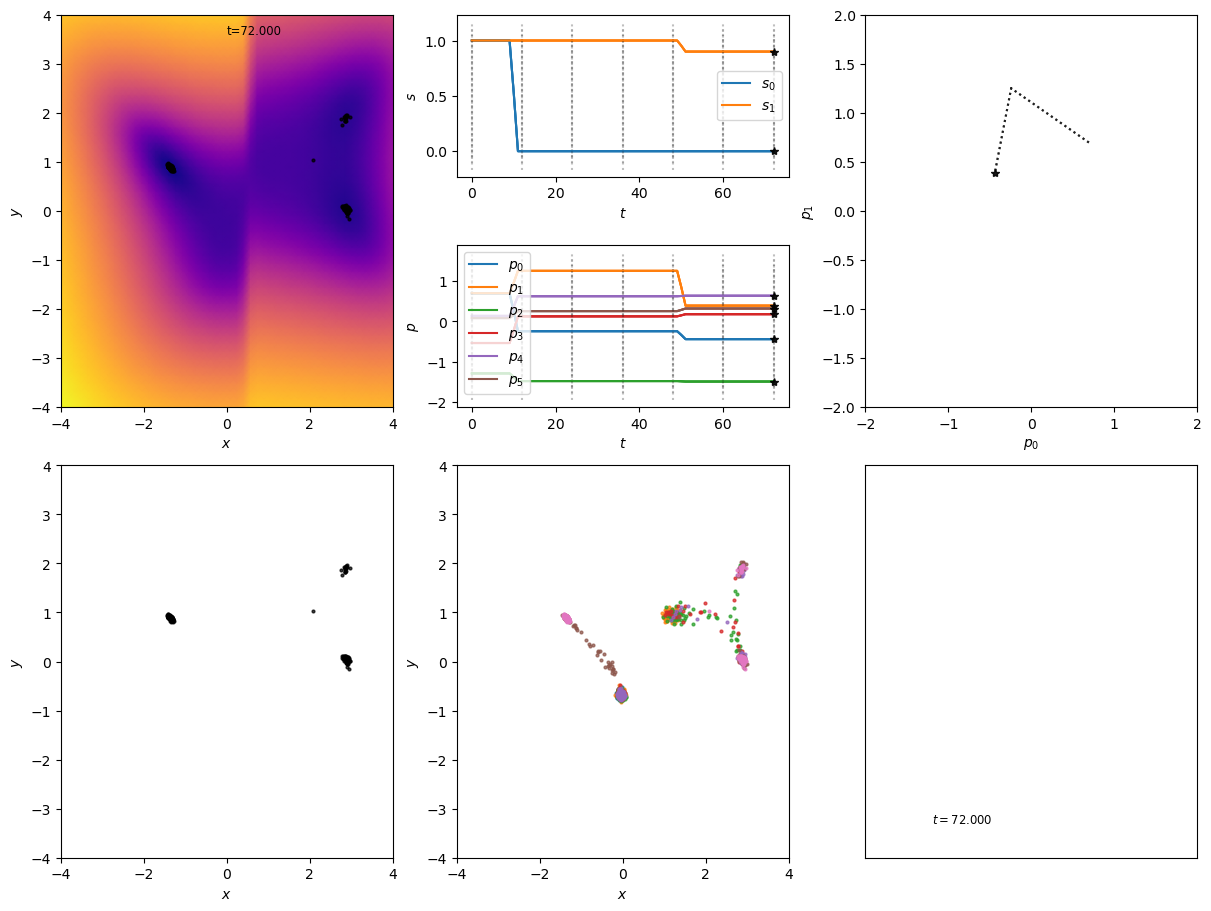

In [27]:
animator.savegif = False
animator.animate(
    savepath=f"{OUTDIR}/{saveas}", 
    duration=10
)